In [30]:
from collections import Counter
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, f1_score
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [31]:
def plot_metrics(test_labels, predictions):
    fpr, tpr, thresholds = roc_curve(test_labels, predictions)
    precision, recall, pr_thresholds = precision_recall_curve(test_labels, predictions)
    pr_thresholds_ext = np.append(pr_thresholds, 1)
    roc_auc0 = roc_auc_score(test_labels, predictions)
    pr_auc0 = auc(recall, precision)

    fig, ax = plt.subplots(1, 3, figsize=(18, 4))

    lw = 2
    ax[0].plot(fpr, tpr, color='darkorange', lw=lw, label='AUC = %0.2f' % roc_auc0)
    ax[0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax[0].set_xlim([-0.05, 1.05])
    ax[0].set_ylim([0.05, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver Operating Characteristic')
    ax[0].legend(loc="lower right")

    lw = 2
    ax[1].plot(recall, precision, color='darkorange',
             lw=lw, label='AUC = {}'.format(pr_auc0))
    # plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Recall (TPR)')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Precision versus Recall')
    ax[1].legend(loc="upper right")

    b = 1
    f_scores = np.vectorize(f_score)(recall, precision, b)

    lw = 2.5
    ax[2].plot(thresholds, tpr-fpr, color='lightblue',lw=lw, label='Youden\'s J Statistic', alpha=1)
    ax[2].plot(pr_thresholds_ext, f_scores, color='darkorange',lw=lw, label='F{} score'.format(b))
    ax[2].plot(pr_thresholds_ext, precision, color='lightgreen',lw=lw, label='precision')
    ax[2].plot(pr_thresholds_ext, recall, color='darkgreen',lw=lw, label='recall')
    ax[2].set_xlim([-0.05, 1.05])
    ax[2].set_ylim([0.00, 1.05])
    ax[2].set_xlabel('Probability threshold')
    ax[2].set_ylabel('')
    ax[2].set_title('Metrics')
    ax[2].legend(loc="lower center")
    
    d = {'roc_thresholds': thresholds, 'fpr': tpr, 'tpr': tpr, 
         'pr_thresholds': pr_thresholds, 'recall': recall, 'precision': precision}

    return d

def f_score(r, p, b=1):
    try:
        val = (1 + b**2) * (p*r)/(b**2*p + r)
    except ZeroDivisionError:
        val = 0
    return val

In [50]:
with open('experiments/test/kwds.txt', 'r') as f0:
    kwds = [l.strip() for l in f0.readlines()]

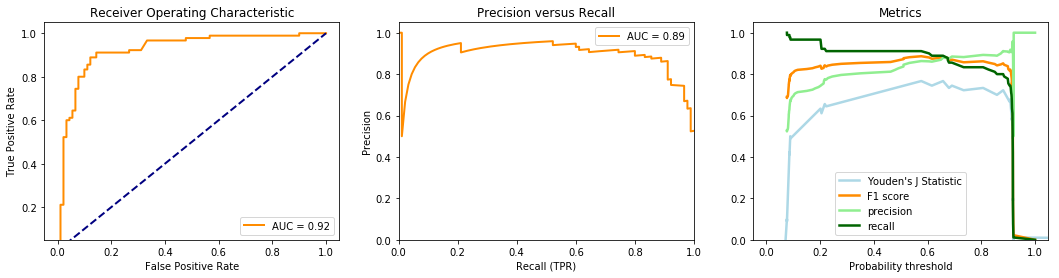

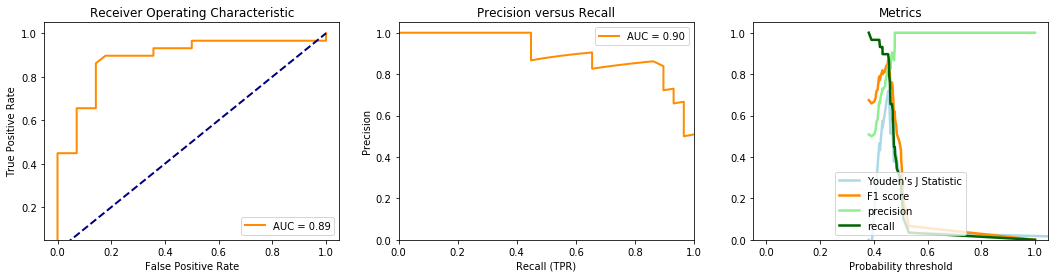

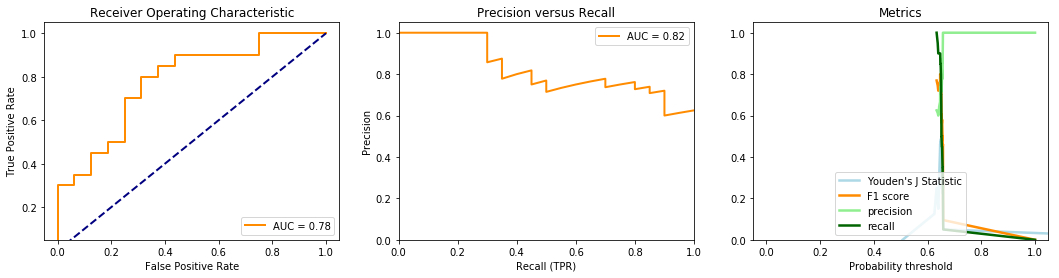

In [51]:
kwd_ml_sets = {}
for kwd in kwds:
    test_df = pd.read_csv(f'experiments/test/{kwd}/test.tsv', sep='\t')
    test_results_df = pd.read_csv(f'experiments/test/{kwd}/test_results.tsv', sep='\t', header=None)
    test_results_df.columns = ['no', 'yes']
    df = test_df.join(test_results_df)

    valid_rows = np.vectorize(lambda x: not np.isnan(x))(df.no)
    Counter(valid_rows)

    valid_df = df[valid_rows]
    kwd_ml_sets[kwd] = valid_df
    results = plot_metrics(valid_df.label, valid_df.yes)

In [96]:
train_df = pd.read_csv('experiments/multi_test/train.tsv', sep='\t')
test_df = pd.read_csv('experiments/multi_test/test.tsv', sep='\t')
test_results_df = pd.read_csv('experiments/multi_test/test_results.tsv', sep='\t', header=None)
test_results_df.columns = ['no', 'yes']
df = test_df.join(test_results_df)

In [97]:
import json
with open('experiments/multi_test/id_to_label.json') as f0:
    id_to_label = json.load(f0)

In [98]:
scores = df.iloc[0, 0+2:17185+2]

sorted_inds = np.argsort(scores.values)[::-1]
sorted_scores = np.sort(scores.values)[::-1]

In [99]:
sorted_terms = np.vectorize(lambda i: id_to_label[str(i)])(sorted_inds)
term_scores_df = pd.DataFrame(np.array([sorted_terms, sorted_scores]).T)

term_scores_df.columns = ['term', 'score']
term_scores_df.head()

,term,score
0,management systems,0.00699072
1,reliability analysis,0.00646231
2,space psychology,0.00616659
3,interstellar matter,0.00555193
4,coal,0.00548984


In [95]:
df.iloc[0]['abstract']

'Laboratory experiments to quantify the global production of NOx (NO + NO2) in the troposphere due to atmospheric lightning and biogenic activity in soil are presented.  These laboratory experiments, as well as other studies, suggest that the global production of NOx by lightning probably ranges between 2 and 20 MT(N)y-1 of NO and is strongly dependent on the total energy deposited by lightning, a quantity not well-known.  In our laboratory experiments, nitrifying micro-organisms is soil were found to be a significant source of both NO and nitrous oxide (N2O).  The measured production ratio of NO to N2O averaged 2-3 for oxygen  partial pressures of 0.5-10%.  Extrapolating these laboratory measurements to the global scale, which is somewhat risky, suggests that nitrifying micro-organisms in soil may account for as much as 10 MT(N) y-1 of NO.  Additional experiments with denitrifying micro-organisms gave an NO to N2O production ratio ranging from 2 to 4 for an oxygen partial pressure of 

In [92]:
valid_rows = np.vectorize(lambda x: not np.isnan(x))(df.no)
Counter(valid_rows)

valid_df = df[valid_rows]
kwd_ml_sets[kwd] = valid_df
results = plot_metrics(valid_df.label, valid_df.yes)

AttributeError: 'DataFrame' object has no attribute 'no'

55


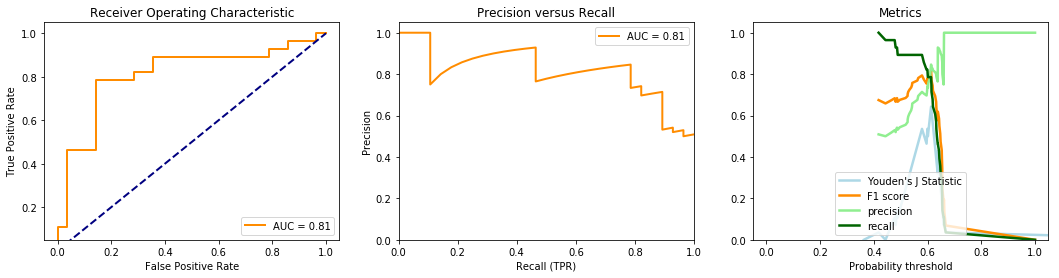

In [38]:
# results = plot_metrics(valid_df.label, valid_df.yes)

In [7]:
# indicators = ['mar', 'curiosity']

# fps = np.vectorize(lambda x, y: (x == 0) and (y > 0.5))(valid_df.label, valid_df.yes)
# with_mars_indicators = np.vectorize(lambda x, y: x and ('mars' in y))(fps, valid_df.abstract)

# print(Counter(fps))
# Counter(with_mars_indicators)

# valid_df.loc[fps, 'abstract'].iloc[5]

# read space sciences

In [53]:
test = pd.read_csv('space_sciences/test.tsv', sep='\t')
test_results = pd.read_csv('space_sciences/tf/test_results.tsv', sep='\t', header=None)
test_results.columns = ['no', 'yes']
assert test.shape[0] == test_results.shape[0]
df = test.join(test_results)

In [54]:
valid_rows = np.vectorize(lambda x: not np.isnan(x))(df.no)
Counter(valid_rows)

Counter({True: 133384})

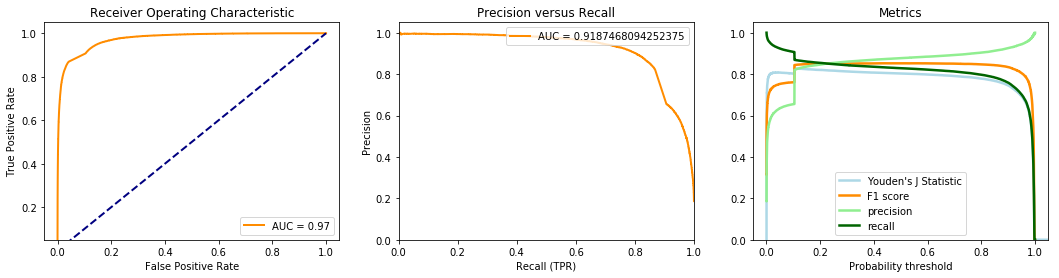

In [56]:
valid_df = df[valid_rows]
results = plot_metrics(valid_df.label, valid_df.yes)

In [81]:
small_df = valid_df.iloc[0:10].loc[:, ['label', 'abstract']]

In [82]:
small_df

,label,abstract
0,0,A broad review is given of vision science and ...
1,0,Although the Sea-viewing Wide Field-of-view Se...
2,0,A preliminary design of a general architecture...
3,0,Stirling Engine's advanced technology engine o...
4,0,Package of computer programs determine longitu...
5,0,The deformation of the fluid column by an acti...
6,0,The California Student Get Away Special Payloa...
7,1,Accurately predicting the excavation force tha...
8,0,A dynamic stiffness method is developed for th...
9,0,Satellite observations have shown a positive c...


In [66]:
!ls experiments/test_results

predict.tf_record  test.tsv  test_results.tsv


In [83]:
small_df.to_csv('experiments/test_results/test.tsv', sep='\t', index=None)

In [95]:
in_small_df = pd.read_csv('experiments/test_results/test.tsv', sep='\t')
in_small_df_results = pd.read_csv('space_sciences/tf/test_results.tsv', sep='\t', header=None)

In [100]:
in_small_df_results.columns = ['no', 'yes']
assert in_small_df.shape[0] == in_small_df_results.shape[0]
df = in_small_df.join(in_small_df_results)

In [105]:
df.iloc[7]['abstract']

'Accurately predicting the excavation force that will be encountered by digging tools on the lunar surface is a crucial element of in-situ resource utilization (ISRU). Based on principles of soil mechanics, this paper develops an analytical model that is relatively simple to apply and uses soil parameters that can be determined by traditional soil strength tests. The influence of important parameters on the excavation force is investigated. The results are compared with that predicted by other available theories. Results of preliminary soil tests on lunar stimulant are also reported.'

# space sciences dev

In [108]:
dev = pd.read_csv('space_sciences/dev.tsv', sep='\t')

In [113]:
with open('experiments/test_results/test_input.txt', 'w') as f0:
    for abstract in dev['abstract']:
        f0.write("{}\n".format(abstract))

In [110]:
dev['abstract']

0                                                       NaN
1         Design methods are described for unobstructed,...
2         This study investigates the effects of grid to...
3         One or more of three possible objectives, enco...
4         The NASA Glenn Research Center initiated basel...
5         It is desirable to perform qualification tests...
6         Studies were made of the electron density prof...
7         Under this grant we have pursued studies of lo...
8         Class of globally stable laws for control of o...
9         Previous studies have shown that the oxygen up...
10                                                      NaN
11        The amounts and composition of residual gases ...
12        This is the third annual technical report for ...
13        Among the different elements to be investigate...
14        Glaciers are important indicators of global cl...
15        Galileo images of bright lava flows surroundin...
16        A transatmospheric vehicle usi